<a href="https://colab.research.google.com/github/thiagosantos346/mnist_handwrite_classifaction/blob/main/Mnist_handwrite_classifaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A baixo tem todas as bibliotecas que serão utilizadas,
dentre elas : 

*   Modelos matematicos sequenciais;
*   Camadas aplicaveis a imagens;
*   Auxilio a categorização de imagens;
*   Bando de imagens de digitos escritos a mão
*   Criação de gráficos;
*   E por fim uma bliblioterica matématica.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


Para treinar uma rede neural precisamos dividir nossos dados, parte serivar como os exercicios que iram ajudar a rede neura a criar seu modelo de aprendizagem, já outra parte sever como uma prova de que ele aprendeu de fato e não apenas decorou tudo e está trapaceando.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Podemos ver que existem no conjunto de treino 60 mil imagens e no conjunto de teste 10 mil imagens, que estão na resolução de 28x28 pixels.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Abaixo vamos ver como são uma dessas imagens, note que ao analisar só vamos ver números, cada número vai representar uma cor, e dentre dessa imagens temos 784 números de 0 a 255, o que na pratica é basicamente imagem de 28x28, veja :

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Bom essa matriz corresponde a um numero vamos ver qual é?

In [ ]:
print(y_train[0])

5


Vamos tentar converter isso para uma imagem mesmo ao invez dessa matriz gigante?

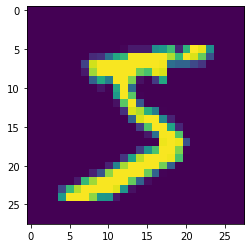

In [ ]:
plt.imshow(X_train[0])

Bom até aqui estavamos apenas nos preparando, pegamos nossas ferramentas, e vasculhamos nossos dados agora vamos começar a configurar nossa rede neural para começar a classificar nossos dados.

A primeira coisa a se fazer é reorganizar nossos dados.

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_teste =  X_test.reshape(10000, 28, 28, 1)

A proxima coisa é tranformar as nossas respostas(se é o número 1, 2, 3, 4, ... 9 ou 10) em catégorias, para que na nossa rede neural consiga classifica-los

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Veja agora como ficou os dados, teremos 10 poisições e apenas a que é a corrta será marcada com o número 1, no caso o primeiro digito era o digito 5, ele ve apacer na sexta posição, pois o primeiro digito é o zero, veja como ele foi representado :

In [ ]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Agora vamos criar o modelo de classificação, ou seja nossa rede neural proprimente dita.

A nossa rede é CNN (Convolutional neural network).

A imagem abaixo representa o que ela faz :

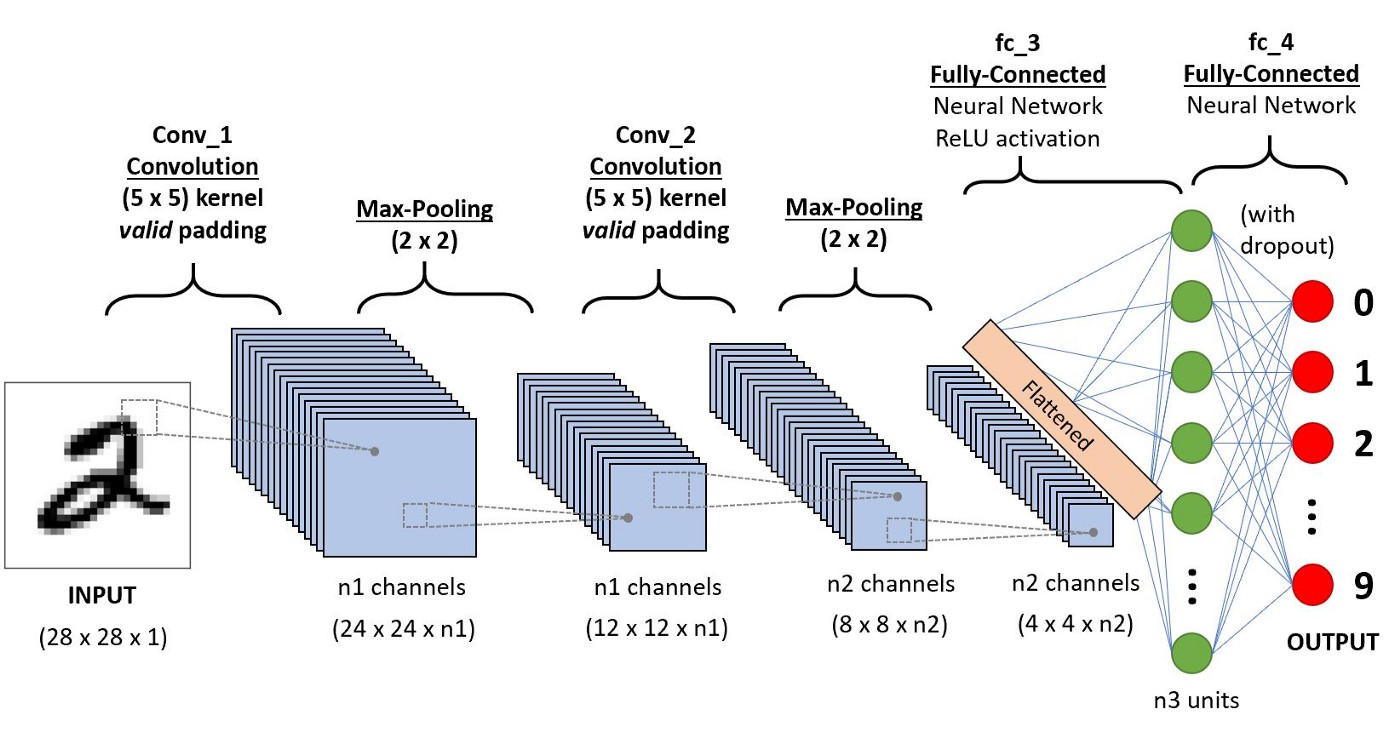

In [ ]:
model = Sequential()

# Aqui abaixo vamos adicionar nossas camadas ao nosso modelo
# Primeira camada
model.add(
    Conv2D(
          64
        , kernel_size=3
        , activation='relu'
        , input_shape=(28, 28, 1)
    )
)
# Segunda camada
model.add(
    Conv2D(
          32
        , kernel_size=3
        , activation='relu'
    )
)
# Terceira camada
model.add(
    Flatten()
)
# Quarta camada
model.add(
    Dense(
          10
        , activation='softmax'
    )
)

In [ ]:
# Vamos compilar o nosso modelo, isto é juntar tudo e fazer a nossa rede neural
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Bom já configuramos toda a nossa rede suas camadas e juntamos tudo para que possa funcionar, agora vamos em fim treina-la(ensina-la entender números escritos a mão).


In [ ]:
hist = model.fit(
      X_train
    , y_train_one_hot
    , validation_data=(
        X_test
      , y_test_one_hot
    )
    , epochs=2
)

Epoch 1/2
1875/1875 [==============================] - 225s 119ms/step - loss: 0.2685 - accuracy: 0.9495 - val_loss: 0.0877 - val_accuracy: 0.9725
Epoch 2/2
1875/1875 [==============================] - 220s 117ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0941 - val_accuracy: 0.9734


Agora vamos ver um pouco de como foi o nosso treinamento com um gráfico :

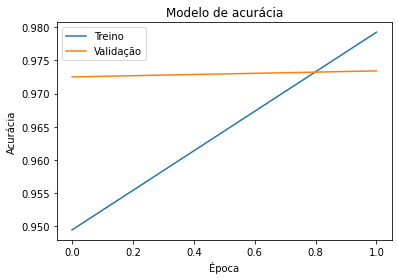

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Modelo de acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [ ]:
hist.model.predict(
    X_test[:1]
)

1/1 [==============================] - 0s 68ms/step


array([[4.1157482e-09, 3.3716493e-12, 1.5851640e-05, 9.7132695e-05,
        4.8578468e-14, 2.8864588e-10, 5.9566859e-13, 9.9988532e-01,
        1.5946531e-06, 3.1934558e-08]], dtype=float32)

A partir daqui começa a pate mais interesante, vamos testar a nossa inteligencia artificial com exemplos reais, para isso vamos importar algumas bibliotecas para tranformar uma foto tirada usando uma câmera em um formato que a nossa inteligência compreenda.

In [ ]:
import cv2
import matplotlib.image as mpimg

Vamos fazer a transformação da algumas das imagens, mas antes vamos visualizar uma delas :

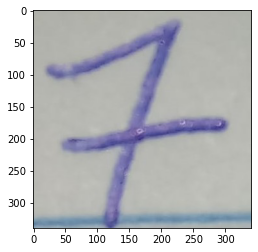

In [ ]:
picture = '/7.jpeg'

img = mpimg.imread(picture)
imgplot = plt.imshow(img)
plt.show()

Agora vamos fazer os nossos ajustes e ver como ficou posteriormente :

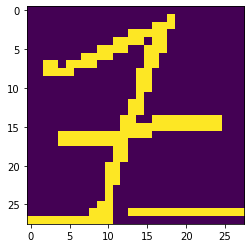

In [ ]:
# Lendo a imagem 
test_image = cv2.imread(picture)
test_image = cv2.cvtColor(
      test_image
    , cv2.COLOR_BGR2GRAY
 )

# alterando para preto e branco
img_resized = cv2.resize(
      test_image
    , (28, 28)
    , interpolation=cv2.INTER_LINEAR
)

ret, image_mono = cv2.threshold(
      img_resized
    , 10
    , 255
    , cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

image_mono = cv2.bitwise_not(image_mono)
# Formatando a imagem 


plt.imshow(image_mono)

In [ ]:
n_test = np.array(image_mono)

n_test =  n_test.reshape(1, 28, 28, 1)

y_pred = hist.model.predict(
    n_test[:1]
)

print(y_pred)


1/1 [==============================] - 0s 45ms/step
[[5.40088483e-16 6.69504516e-06 2.45539448e-03 4.62409917e-05
  1.02617516e-04 4.48647825e-07 4.03491470e-07 9.97388184e-01
  4.11275813e-09 1.35857766e-11]]


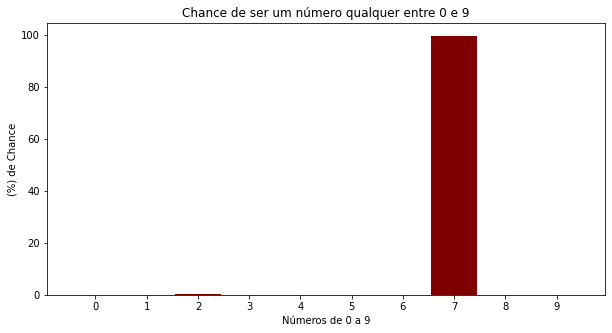

In [ ]:

data = {
      '0': (round(y_pred[0][0] * 100, 3 ))
    , '1': (round(y_pred[0][1] * 100, 3 ))
    , '2': (round(y_pred[0][2] * 100, 3 ))
    , '3': (round(y_pred[0][3] * 100, 3 ))
    , '4': (round(y_pred[0][4] * 100, 3 ))
    , '5': (round(y_pred[0][5] * 100, 3 ))
    , '6': (round(y_pred[0][6] * 100, 3 ))
    , '7': (round(y_pred[0][7] * 100, 3 ))
    , '8': (round(y_pred[0][8] * 100, 3 ))
    , '9': (round(y_pred[0][9] * 100, 3 ))
}

courses = data.keys()
values = data.values()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.9)
 
plt.ylabel("(%) de Chance")
plt.xlabel("Números de 0 a 9")
plt.title("Chance de ser um número qualquer entre 0 e 9")
plt.show()